# How similar are documents in different languages?
In this notebook, I'm going to train a doc2vec model on the chosen books and see how well it can cluster the books by language.

### Import libraries and paths

In [1]:
import pandas as pd
from pathlib import Path
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.utils import simple_preprocess
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
data_folder = Path.cwd().parent / 'data'
transformed_folder = data_folder / 'transformed'
BOOKS_PATH = Path(transformed_folder, "books_final.csv")
import seaborn as sns


### Import the dataframe

In [2]:
book_df = pd.read_csv(BOOKS_PATH)
languages=book_df.language.unique()
book_df.language.value_counts()

language
English                                4655
Spanish; Castilian                       18
French                                   15
Indonesian                               10
Arabic                                    7
German                                    6
Portuguese                                4
Japanese                                  3
Italian                                   2
Polish                                    2
Multiple languages                        1
Romanian                                  1
Vietnamese                                1
Turkish                                   1
Bokmål, Norwegian; Norwegian Bokmål       1
Scots                                     1
Persian                                   1
Name: count, dtype: int64

See the non english documents

In [3]:
non_english_books = book_df[book_df.language != 'English']

### Train a doc2vec model

In [4]:
training_corpus = np.empty(len(book_df), dtype=object)
for i, (isbn, desc) in tqdm(enumerate(zip(book_df['isbn'], book_df['description']))):
    training_corpus[i] = TaggedDocument(simple_preprocess(desc), [str(i)])
model=Doc2Vec(vector_size=50, min_count=5, epochs=40)
model.build_vocab(training_corpus)
#train the model
model.train(training_corpus, total_examples=model.corpus_count, epochs=model.epochs)
#get the keys of the trained model
model_keys=list(model.dv.key_to_index.keys())
matrix = model.dv.vectors

816it [00:00, 2476.41it/s]

4742it [00:01, 2494.55it/s]


Calculate the average number of words in the documents

In [5]:
#calculate the average number of words in the documents
average_words = np.mean([len(x.words) for x in training_corpus])
average_words

144.89434837621258

Create a similarity matrix

In [6]:
similarity_matrix = cosine_similarity(matrix)


### Visualize the similarities between languages
Group the indices of different languages
Create matrices with only the similarities of the selected_languages

In [7]:
indices_for_language = {}
for language, group_df in book_df.groupby('language'):
    indices_for_language[language] = group_df.index.to_list()


French and Indonesian

<Axes: >

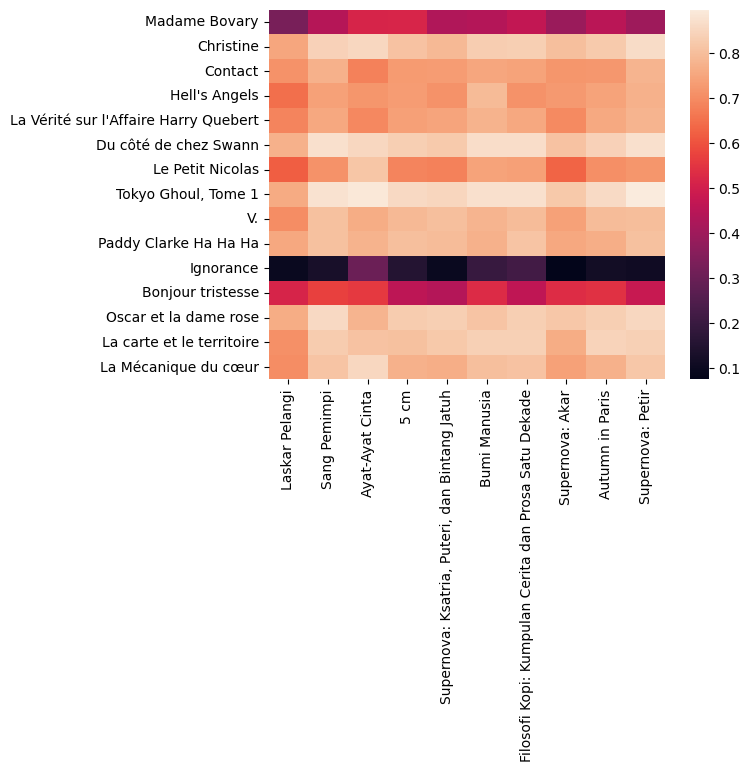

In [8]:
sim_french_indonesian = similarity_matrix[indices_for_language['French']][:, indices_for_language['Indonesian']]
sim_french_indonesian.shape
#make a heatmap
sns.heatmap(sim_french_indonesian,xticklabels=book_df.iloc[indices_for_language['Indonesian']]['title'],yticklabels=book_df.iloc[indices_for_language['French']]['title'])

German and Arabic

<Axes: >

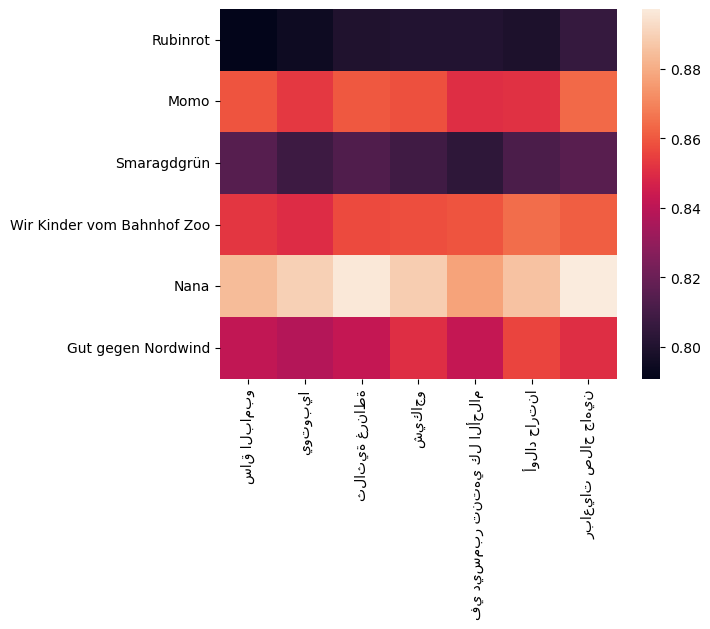

In [9]:
sim_german_arabic = similarity_matrix[indices_for_language['German']][:, indices_for_language['Arabic']]
#make a heatmap
sns.heatmap(sim_german_arabic,xticklabels=book_df.iloc[indices_for_language['Arabic']]['title'],yticklabels=book_df.iloc[indices_for_language['German']]['title']) 

Print all arabic words and the words most similar to them

In [10]:
books_df_german=book_df[book_df.language == 'German']
books_df_arabic = book_df[book_df.language == 'Arabic']
#print all arabic words and the words most similar to them
for index in books_df_arabic.index:
    words=training_corpus[index].words
    #find the most similar word to each word
    for word in words:
        try:
            similar_word=model.wv.most_similar(word)
            print("Current word: ", word)
            print("Most similar word: ", similar_word)
        except:
            continue

Current word:  أن
Most similar word:  [('إلى', 0.9977820515632629), ('لا', 0.9971452355384827), ('الرواية', 0.9969347715377808), ('هذه', 0.9962663650512695), ('حتى', 0.9958113431930542), ('من', 0.9954559206962585), ('عن', 0.9950757026672363), ('في', 0.9948878288269043), ('أو', 0.9944080114364624), ('على', 0.9932140707969666)]
Current word:  في
Most similar word:  [('على', 0.9978271126747131), ('عن', 0.9975808262825012), ('لا', 0.9969528913497925), ('حتى', 0.9969030022621155), ('إلى', 0.9968440532684326), ('من', 0.9968343377113342), ('غرناطة', 0.9968340992927551), ('عام', 0.9953468441963196), ('أن', 0.9948877096176147), ('أو', 0.9945385456085205)]
Current word:  ما
Most similar word:  [('على', 0.9957300424575806), ('من', 0.9947709441184998), ('في', 0.9927579164505005), ('لا', 0.9926391243934631), ('أو', 0.992301881313324), ('إلى', 0.9917216897010803), ('حتى', 0.9915192723274231), ('عن', 0.990702748298645), ('هذه', 0.990379273891449), ('أن', 0.9891899228096008)]
Current word:  إلى
Most s

Japanese and Italian

In [11]:
sim_japanese_italian = similarity_matrix[indices_for_language['Japanese']][:, indices_for_language['Italian']]
#make a heatmap
sns.heatmap(sim_japanese_italian,xticklabels=book_df.iloc[indices_for_language['Italian']]['title'],yticklabels=book_df.iloc[indices_for_language['Japanese']]['title'])

c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.draw()
c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 23569 (\N{CJK UNIFIED IDEOGRAPH-5C11}) missing from current font.
  fig.canvas.draw()
c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from current font.
  fig.canvas.draw()
c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 25126 (\N{CJK UNIFIED IDEOGRAPH-6226}) missing from current font.
  fig.canvas.draw()
c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  fig.canvas.draw()
c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\seaborn\ut

<Axes: >

c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  func(*args, **kwargs)
c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 23569 (\N{CJK UNIFIED IDEOGRAPH-5C11}) missing from current font.
  func(*args, **kwargs)
c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from current font.
  func(*args, **kwargs)
c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 25126 (\N{CJK UNIFIED IDEOGRAPH-6226}) missing from current font.
  func(*args, **kwargs)
c:\Users\Eleonora\anaconda3\envs\dipomska\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  func(*args, **kwargs)
c:\Users\Eleonora\an

In [12]:
#all japanese documents
books_df_japanese = book_df[book_df.language == 'Japanese']
#all italian documents
books_df_italian = book_df[book_df.language == 'Italian']

Print all japanese words and the words most similar to them

In [13]:
#print all japanese words and the most similar words to them in the vocabulary
for index in books_df_japanese.index:
    words=training_corpus[index].words
    #find the most similar word to each word
    for word in words:
        try:
            similar_word=model.wv.most_similar(word)
            print("Current word: ", word)
            print("Most similar word: ", similar_word)
        except:
            continue

Print all italian words and the most similar to them in the vocabulary

In [14]:
#print all italian words and the most similar words to them in the vocabulary
for index in books_df_italian.index:
    words=training_corpus[index].words
    #find the most similar word to each word
    for word in words:
        try:
            similar_word=model.wv.most_similar(word)
            print("Current word: ", word)
            print("Most similar word: ", similar_word)
        except:
            continue

Current word:  edition
Most similar word:  [('isbn', 0.6869809031486511), ('annotated', 0.6829478144645691), ('collection', 0.6321750283241272), ('anniversary', 0.629069447517395), ('volume', 0.6280702352523804), ('hardcover', 0.6182914972305298), ('editions', 0.6174444556236267), ('translation', 0.5967341661453247), ('inexpensive', 0.5948659777641296), ('foreword', 0.5925939083099365)]
Current word:  il
Most similar word:  [('et', 0.9234558343887329), ('qu', 0.9066148996353149), ('dans', 0.9050803780555725), ('vous', 0.8875827193260193), ('ces', 0.8849743604660034), ('amour', 0.8847758173942566), ('est', 0.8824977278709412), ('libro', 0.881991982460022), ('más', 0.879989504814148), ('qui', 0.878966212272644)]
Current word:  era
Most similar word:  [('achievement', 0.6339536309242249), ('japan', 0.61012202501297), ('capitalism', 0.59366774559021), ('invention', 0.5856262445449829), ('antihero', 0.5827829837799072), ('drama', 0.5797852873802185), ('presentation', 0.5674103498458862), ('

English and Indonesian

In [15]:
sim_english_indonesian = similarity_matrix[indices_for_language['English']][:, indices_for_language['Indonesian']]
#make a heatmap
sns.heatmap(sim_english_indonesian)

<Axes: >

### Visualize how the similarities spread out

In [16]:
similarity_matrix.shape

(4742, 4742)

In [17]:
#get the upper triangle of the similarity matrix
upper_triangle = similarity_matrix[np.triu_indices(similarity_matrix.shape[0], k=1)]
#plot the histogram
sns.histplot(upper_triangle)

<Axes: ylabel='Count'>

### Conclusion
I am getting unusually high similarities between french and indonesian, german and arabic. I am not sure why this is happening. Non-english documents are a small subset of the data, so I think that they won't impact the recommender's performance that much.